In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv(r"C:\Users\nisha\Desktop\Ducat\Stats\DiabetesMissingData.csv")
df.head()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    int64  
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                757 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [37]:
df.isnull().sum()

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

In [39]:
Serum_Insulin= (df["Serum_Insulin"].isnull().sum()/df["Serum_Insulin"].shape[0])*100
Skin_Fold= (df["Skin_Fold"].isnull().sum()/df["Skin_Fold"].shape[0])*100
Diastolic_BP= (df["Diastolic_BP"].isnull().sum()/df["Diastolic_BP"].shape[0])*100
BMI= (df["BMI"].isnull().sum()/df["BMI"].shape[0])*100
Glucose= (df["Glucose"].isnull().sum()/df["Glucose"].shape[0])*100
print(Glucose,"%")
print(BMI,"%")
print(Diastolic_BP,"%")
print(Skin_Fold,"%")
print(Serum_Insulin,"%")

0.6510416666666667 %
1.4322916666666665 %
4.557291666666666 %
29.557291666666668 %
48.69791666666667 %


In [41]:
df.describe(include ="all")

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Missing values

In [44]:
Missing_Values=pd.DataFrame(df.isnull().sum())
display(Missing_Values)

,0
Pregnant,0
Glucose,5
Diastolic_BP,35
Skin_Fold,227
Serum_Insulin,374
BMI,11
Diabetes_Pedigree,0
Age,0
Class,0


In [46]:
Missing_Values=Missing_Values.reset_index()
Missing_Values

,index,0
0,Pregnant,0
1,Glucose,5
2,Diastolic_BP,35
3,Skin_Fold,227
4,Serum_Insulin,374
5,BMI,11
6,Diabetes_Pedigree,0
7,Age,0
8,Class,0


In [48]:
Missing_Values.columns

Index(['index', 0], dtype='object')

In [50]:
Missing_Values

,index,0
0,Pregnant,0
1,Glucose,5
2,Diastolic_BP,35
3,Skin_Fold,227
4,Serum_Insulin,374
5,BMI,11
6,Diabetes_Pedigree,0
7,Age,0
8,Class,0


In [52]:
Missing_Values=Missing_Values.rename(columns={"index":"Variables",
                       0:"Missing_Values"  })
Missing_Values

,Variables,Missing_Values
0,Pregnant,0
1,Glucose,5
2,Diastolic_BP,35
3,Skin_Fold,227
4,Serum_Insulin,374
5,BMI,11
6,Diabetes_Pedigree,0
7,Age,0
8,Class,0


In [54]:
# Calculate Percentage
Missing_Values["Missing_Percentage"]=(Missing_Values["Missing_Values"]/len(df))*100


In [56]:
Missing_Values

,Variables,Missing_Values,Missing_Percentage
0,Pregnant,0,0.000000
1,Glucose,5,0.651042
2,Diastolic_BP,35,4.557292
3,Skin_Fold,227,29.557292
4,Serum_Insulin,374,48.697917
5,BMI,11,1.432292
6,Diabetes_Pedigree,0,0.000000
7,Age,0,0.000000
8,Class,0,0.000000


In [58]:
miss_val=Missing_Values.sort_values("Missing_Percentage",ascending =False).reset_index(drop=True)
display(miss_val)

,Variables,Missing_Values,Missing_Percentage
0,Serum_Insulin,374,48.697917
1,Skin_Fold,227,29.557292
2,Diastolic_BP,35,4.557292
3,BMI,11,1.432292
4,Glucose,5,0.651042
5,Pregnant,0,0.000000
6,Diabetes_Pedigree,0,0.000000
7,Age,0,0.000000
8,Class,0,0.000000


# Manual

In [61]:
df.describe()["BMI"]

count    757.000000
mean      32.457464
std        6.924988
min       18.200000
25%       27.500000
50%       32.300000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

<Axes: >

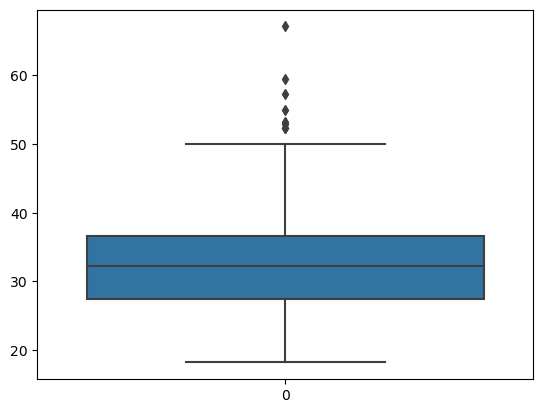

In [63]:
# with outlier : - handel the missing data
sns.boxplot(df["BMI"])

In [64]:
my_val=pd.DataFrame({"myBMI":df["BMI"]})
my_val

,myBMI
0,33.6
1,26.6
2,23.3
3,28.1
4,43.1
...,...
763,32.9
764,36.8
765,26.2
766,30.1


In [65]:
my_val.iloc[3,0]

28.1

In [66]:
# 3rd index / 4th row = 28.1
my_val.iloc[3,0]=np.nan # missing created

In [67]:
my_val.head()

,myBMI
0,33.6
1,26.6
2,23.3
3,NaN
4,43.1


In [68]:
my_val.mean()

myBMI    32.463228
dtype: float64

In [69]:
my_val.median()

myBMI    32.3
dtype: float64

In [70]:
my_val.mode()

,myBMI
0,32.0


In [77]:
my_val.std()

myBMI    6.927756
dtype: float64

In [81]:
my_val.var()

myBMI    47.993798
dtype: float64

In [83]:
my_val.kurt()

myBMI    0.860147
dtype: float64

In [86]:
# without oultlier : handle missing values
my_val=df[["BMI"]]
my_val.dropna(inplace=True)

C:\Users\nisha\AppData\Local\Temp\ipykernel_4920\691235315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_val.dropna(inplace=True)


In [88]:
my_val

,BMI
0,33.6
1,26.6
2,23.3
3,28.1
4,43.1
...,...
763,32.9
764,36.8
765,26.2
766,30.1


In [91]:
my_val

,BMI
0,33.6
1,26.6
2,23.3
3,28.1
4,43.1
...,...
763,32.9
764,36.8
765,26.2
766,30.1


In [93]:
my_val["BMI"].isnull().sum()

0

<Axes: >

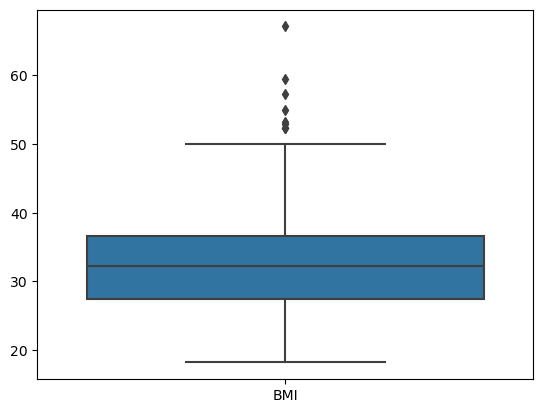

In [95]:
sns.boxplot(my_val)

In [97]:
q75,q25=np.percentile(my_val,[75,25])
q75,q25

(36.6, 27.5)

In [99]:
IQR=q75-q25
IQR

9.100000000000001

In [101]:
q0=q25-(IQR*1.5)
q100=q75+(IQR*1.5)
q0,q100

(13.849999999999998, 50.25)

In [103]:
my_val

,BMI
0,33.6
1,26.6
2,23.3
3,28.1
4,43.1
...,...
763,32.9
764,36.8
765,26.2
766,30.1


In [105]:
my_val[(my_val["BMI"]>=q0) & (my_val["BMI"]>=q100)]

,BMI
120,53.2
125,55.0
177,67.1
193,52.3
247,52.3
303,52.9
445,59.4
673,57.3


<Axes: >

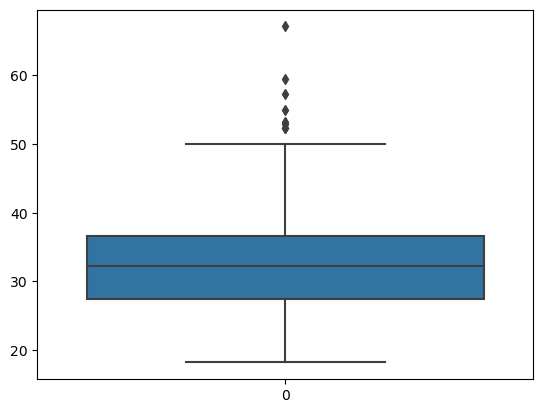

In [107]:
sns.boxplot(my_val["BMI"])

In [109]:
my_val.describe()

,BMI
count,757.000000
mean,32.457464
std,6.924988
min,18.200000
25%,27.500000
50%,32.300000
75%,36.600000
max,67.100000


In [111]:
#3rd Index / 4th Row =28.1
my_val.iloc[3,0]=np.nan #missing created
my_val.head()

C:\Users\nisha\AppData\Local\Temp\ipykernel_4920\1293690139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_val.iloc[3,0]=np.nan #missing created


,BMI
0,33.6
1,26.6
2,23.3
3,NaN
4,43.1


In [113]:
my_val["BMI"].mean()

32.46322751322751

In [115]:
my_val.median()

BMI    32.3
dtype: float64

In [117]:
my_val.mode().iloc[0,0]

32.0